## Demo: Runge Phenomenon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import scipy.interpolate

# Update 07/18/22: got retina working with updates thanks to 
# https://stackoverflow.com/questions/54312924/what-is-matplotlibs-retina-display-mode
%matplotlib inline
%config InlineBackend.figure_format='retina'

In this demo, we demonstrate that polynomial interpolation is a bit of a subtle business. In particular, we look at a classical example of interpolating the "Runge function"
$$ y(x) =  \frac{1}{1+25x^2}, $$
viewed as a function on $[-1,1]$. We shall see that interpolating $y(x)$ on an *equispaced* grid is an unmitigated disaster, but a clever choice of *non-uniform grid* can be used to save the day. 

First, we define our interpolating function. (partially based on code from Adam Stinchcombe)

In [2]:
def LagrangeInterpolant(x,f,xq):
    #evaluates the Lagrange interpolant through data (x_m,f_m) at xq by user-specified method: 
    # meth=1 gives the "naive" approach, and meth=2 uses the nicer barycentric method
    n = np.size(f);
        
    meth=2; # specify which of the two methods you want
    
    P = np.zeros_like(xq) #interpolant
        
    indices = np.arange(0,n)
    
    if meth==1: #naive formula
        
        A = np.tile(xq, [n-1,1]).T # repeats xq "n-1" times: idea is to form one big matrix,
        #then take products over rows. This helps slim down the code via vectorization: using 
        #np.prod appropriately is cleaner than writing nested loops. 

        for k in indices: 
            
            j = np.delete(indices, k)
            
            a = np.prod(x[k] - x[j]) 
                           
            P += f[k]*np.prod(A -x[j].T, axis=1)/a 
            # transposes in the above are necessary because of Numpy's broadcasting conventions
    
    elif meth==2: # use the more numerically stable barycentric formula instead
    
        # first, we determine the weights w_1,...w_n
        A = np.tile(x, [n-1,1]).T
    
        for k in indices:
            j = np.delete(indices,k)
            A[k,:] -= x[j].T

        w = 1./np.prod(A, axis=1) # get weights
                
        # now, we determine the numerator and denominator in the barycentric formula
        
        # first, form a matrix B that is length(xq) by n. The (i,j) entry of b is xq[i]-x[j].
        B = np.tile(xq, [n,1]).T
        B -= x.T

        # then, the upstairs and downstairs can be obtained by summing over the right axis of 
        # some arrays... same conceptual strategy used for the naive method. 
        downstairs = np.sum(w/B, axis =1)
        upstairs = np.sum(w*f/B, axis=1)
        
        P = upstairs/downstairs
        
        #TODO: later on, implement a simplified version of the barycentric formula using the exact
        # expression for the w_k's on equispaced or Chebyshev grids?
        
    return P

Now, we define the Runge function we seek to approximate. 

In [3]:
def runge_func(x):
    #evaluates the Runge function "exactly"
    return 1./(1+25.*np.power(x,2))

We are now ready so see how well interpolation on $n$ equispaced nodes approximates the Runge function. Note that we obtain our samples in this case by simply calling $\texttt{runge_func}$ at each node. 

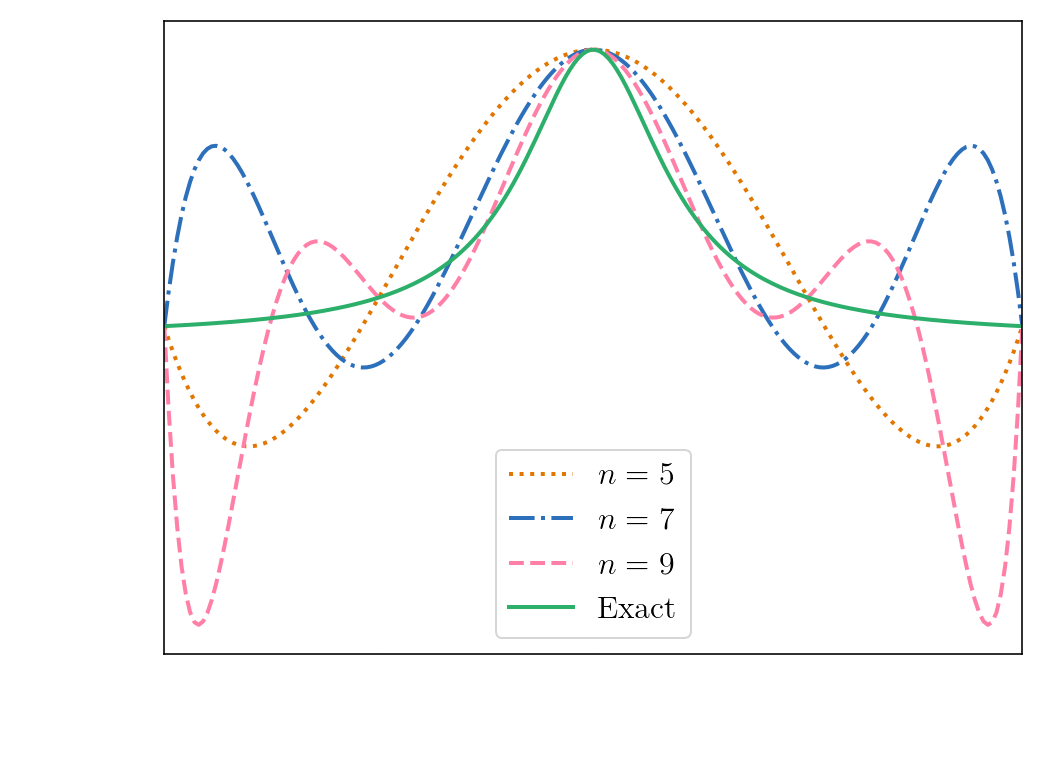

In [4]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rcParams['figure.dpi']= 600
    
xx = np.linspace(-0.9999999999,0.99999999,200) 
# don't use exact endpoints bcz barycentric method will induce divide-by-zero if you do this

nodes5 = np.linspace(-1,1,5)
nodes7 = np.linspace(-1,1,7)
nodes9 = np.linspace(-1,1,9)

samples5 = runge_func(nodes5)
samples7 = runge_func(nodes7)
samples9 = runge_func(nodes9)

yy = LagrangeInterpolant(nodes5, samples5, xx) 
plt.plot(xx, yy, color='xkcd:pumpkin', linewidth='2', linestyle='dotted', label='$n=5$')

yy = LagrangeInterpolant(nodes7, samples7, xx) 
plt.plot(xx, yy, color='xkcd:medium blue', linewidth='2', linestyle='dashdot', label='$n=7$')

yy = LagrangeInterpolant(nodes9, samples9, xx) 
plt.plot(xx, yy, color='xkcd:carnation pink', linewidth='2', linestyle='dashed', label='$n=9$')

plt.plot(xx, runge_func(xx), color='xkcd:jade green', linewidth='2', linestyle='solid', label='Exact')

plt.xlim([-1,1])

ax.legend(fontsize=16)

plt.xlabel(r"$x$", fontsize=26, color = 'w')
plt.ylabel(r"$y$", fontsize=26, color='w')

plt.tick_params(axis='x', which='both', top='off', color = 'w')
plt.xticks(fontsize=16, rotation=0, color = 'w')
plt.tick_params(axis='y', which='both', right='off', color = 'w')
plt.yticks(fontsize=16, rotation=0, color = 'w')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.tight_layout()

fig.set_size_inches(8, 6)

#ax.axes.set_aspect(scaled)

plt.show()

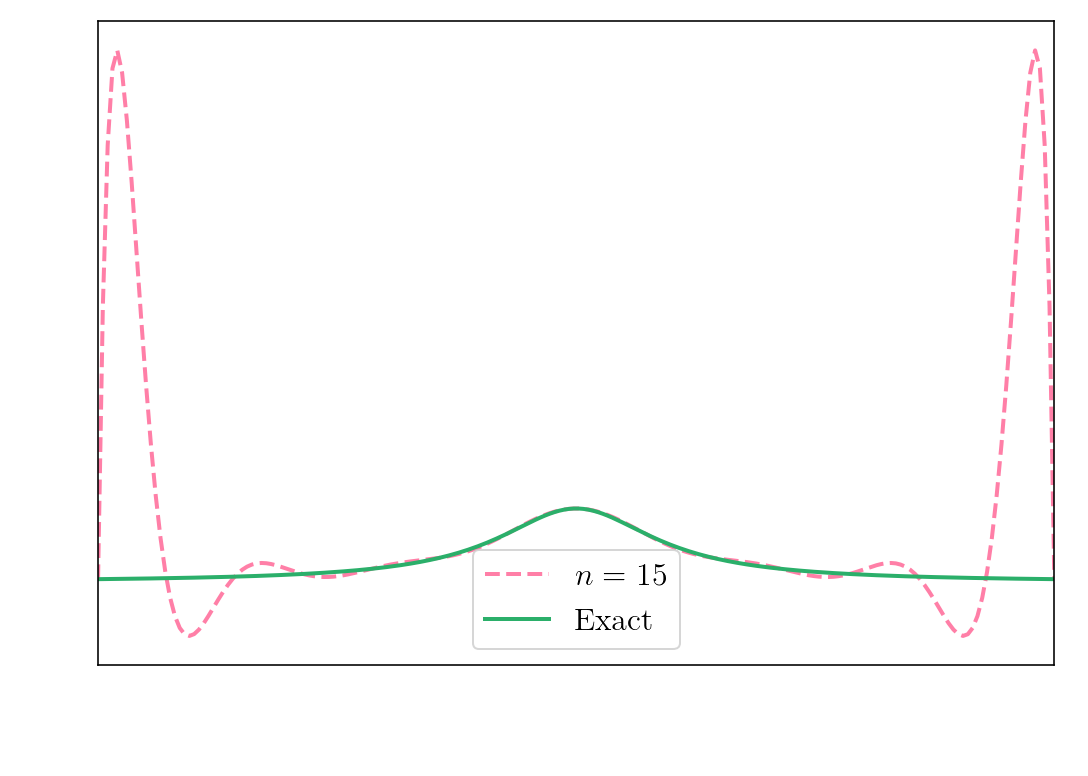

In [5]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    
xx = np.linspace(-0.9999999999,0.99999999,200) 
# don't use exact endpoints bcz barycentric method will induce divide-by-zero if you do this

nodes15 = np.linspace(-1,1,15)
samples15 = runge_func(nodes15)

yy = LagrangeInterpolant(nodes15, samples15, xx) 
plt.plot(xx, yy, color='xkcd:carnation pink', linewidth='2', linestyle='dashed', label='$n=15$')

plt.plot(xx, runge_func(xx), color='xkcd:jade green', linewidth='2', linestyle='solid', label='Exact')

plt.xlim([-1,1])

ax.legend(fontsize=16)

plt.xlabel(r"$x$", fontsize=26, color = 'w')
plt.ylabel(r"$y$", fontsize=26, color='w')

plt.tick_params(axis='x', which='both', top='off', color = 'w')
plt.xticks(fontsize=16, rotation=0, color = 'w')
plt.tick_params(axis='y', which='both', right='off', color = 'w')
plt.yticks(fontsize=16, rotation=0, color = 'w')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.tight_layout()

fig.set_size_inches(8, 6)
    
plt.show()

Notice in particular that, when we use $n=15$ nodes, the agreement of the interpolant with $y(x)$ is decent near $x=0$. The poor fit only becomes apparent when we move closer to the boundary. And the fit IS poor by any standard, with a relative error of over $15000 \%$!

Now, we see how Mr. Chebyshev helps us overcome the problems we've just witnessed. Instead of using $n$ *equispaced* nodes, we choose our nodes to be the *unevenly spaced* roots of the  $n^{\text{th}}$ Chebyshev polynomial (of the first kind). These are given explicitly by the formula
$$ x_{k} = \cos\left(\frac{(2k+1)\pi}{2n}\right), \quad k=0,1,2,...,n-1 \ . $$
Each such $x_{k}$ is called a Chebyshev node. We can easily write a function that computes the Chebyshev nodes for a given $n$: 

In [6]:
def chebnodes(n):
# spits out an array of the n^th Chebyshev nodes in [-1,1]
    theta = (np.pi/(2.*n))*np.arange(1,2*n, dtype=int)[::2] #slicing picks only odd terms
    
    x = np.cos(theta)
    
    return x

To visualise how the Chebyshev nodes are fundamentally different from equispaced nodes, we plot the Chebyshev nodes for various values of $n$. 

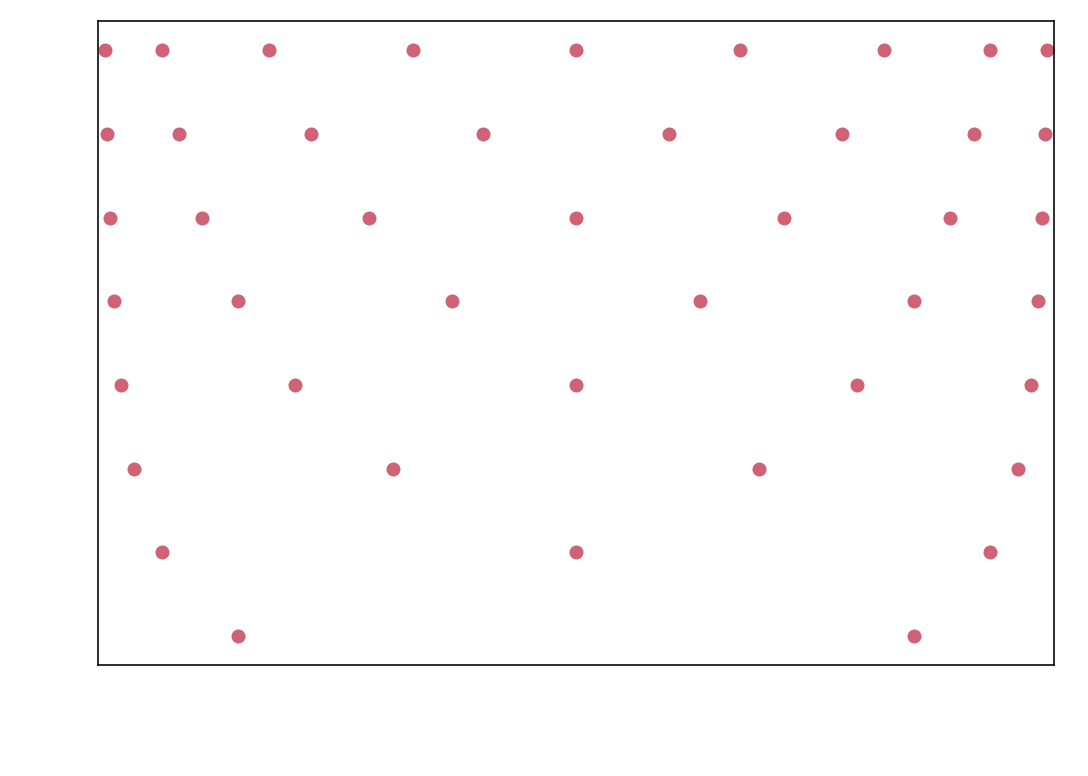

In [7]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for n in np.arange(2,10):
    
    plt.plot(chebnodes(n), n*np.ones_like(chebnodes(n)), 'o', color='xkcd:rose')#, label='$n=9$')

plt.xlim([-1,1])
#plt.ylim([-1e-2,1e-2])

plt.xlabel(r"$x$", fontsize=26, color = 'w')
plt.ylabel(r"$n$", fontsize=26, color='w')

plt.tick_params(axis='x', which='both', top='off', color = 'w')
plt.xticks(fontsize=16, rotation=0, color = 'w')
plt.tick_params(axis='y', which='both', right='off', color = 'w')
plt.yticks(fontsize=16, rotation=0, color = 'w')
#ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)


plt.tight_layout()

fig.set_size_inches(8, 6)
    
plt.show()
plt.show()

Notice that the Chebyshev nodes cluster near the boundary $\pm 1$ as $n$ becomes larger and larger: this is the key distinguishing feature separating uniform interpolation from Chebyshev interpolation, and we'll see presently this feature really saves our skins. 

Now, we try our hand at interpolating the Runge function using Chebyshev nodes instead of equispaced nodes. 

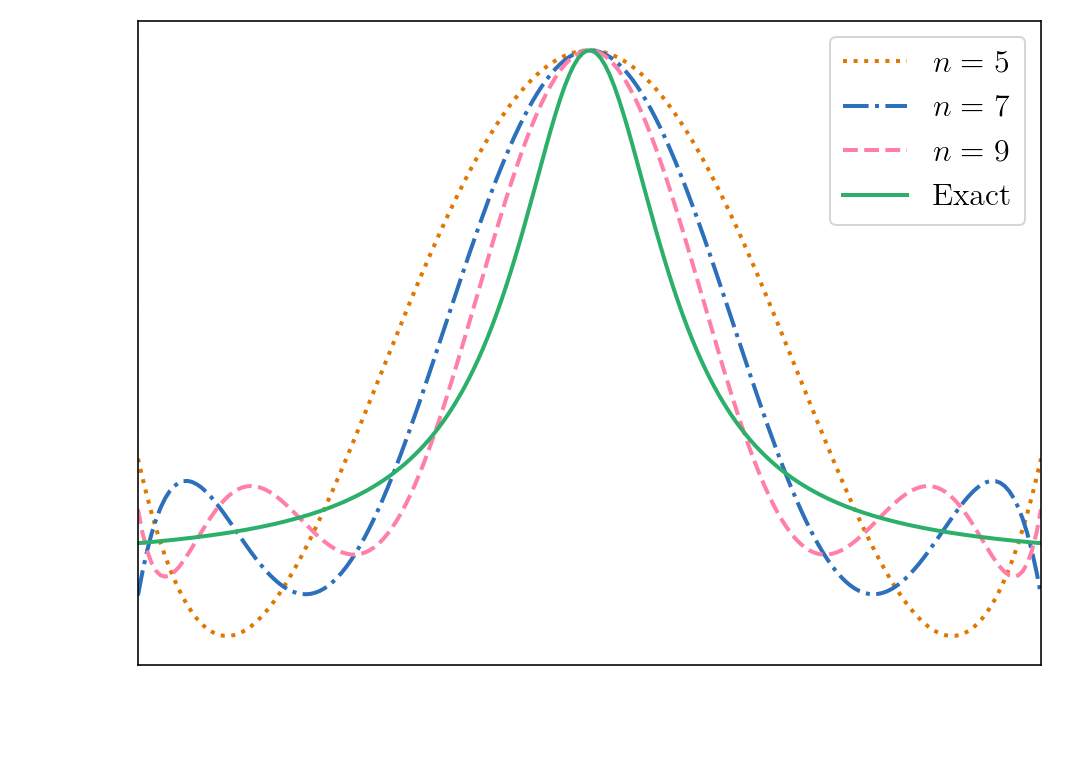

In [8]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    
xx = np.linspace(-0.9999999999,0.99999999,200) 
# don't use exact endpoints bcz barycentric method will induce divide-by-zero if you do this

chebnodes5 = chebnodes(5)
chebnodes7 = chebnodes(7)
chebnodes9 = chebnodes(9)

samples5 = runge_func(chebnodes5)
samples7 = runge_func(chebnodes7)
samples9 = runge_func(chebnodes9)

#"""
#HOMEMADE
yy = LagrangeInterpolant(chebnodes5, samples5, xx) 
plt.plot(xx, yy, color='xkcd:pumpkin', linewidth='2', linestyle='dotted', label='$n=5$')

yy = LagrangeInterpolant(chebnodes7, samples7, xx) 
plt.plot(xx, yy, color='xkcd:medium blue', linewidth='2', linestyle='dashdot', label='$n=7$')

yy = LagrangeInterpolant(chebnodes9, samples9, xx) 
plt.plot(xx, yy, color='xkcd:carnation pink', linewidth='2', linestyle='dashed', label='$n=9$')
#"""

plt.plot(xx, runge_func(xx), color='xkcd:jade green', linewidth='2', linestyle='solid', label='Exact')


plt.xlim([-1,1])

ax.legend(fontsize=16)

plt.xlabel(r"$x$", fontsize=26, color = 'w')
plt.ylabel(r"$y$", fontsize=26, color='w')

plt.tick_params(axis='x', which='both', top='off', color = 'w')
plt.xticks(fontsize=16, rotation=0, color = 'w')
plt.tick_params(axis='y', which='both', right='off', color = 'w')
plt.yticks(fontsize=16, rotation=0, color = 'w')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)


plt.tight_layout()

fig.set_size_inches(8, 6)
    
plt.show()

This is a big improvement over what we saw earlier! The edge oscillations are much less dramatic, and their amplitude appears to be *decreasing* as $n$ increases. We can confirm this by also plotting the $n=15$ Chebyshev interpolant: 

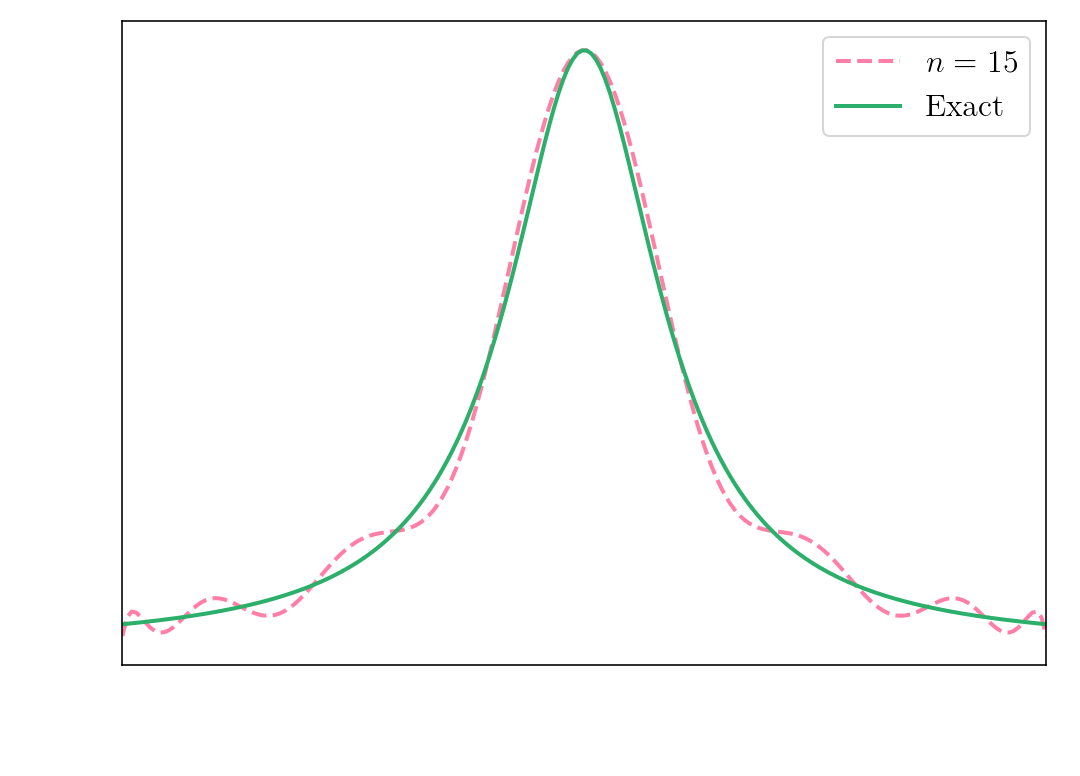

In [9]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    
xx = np.linspace(-0.9999999999,0.99999999,200) 
# don't use exact endpoints bcz barycentric method will induce divide-by-zero if you do this

chebnodes15 = chebnodes(15)
samples15 = runge_func(chebnodes15)

yy = LagrangeInterpolant(chebnodes15, samples15, xx) 
plt.plot(xx, yy, color='xkcd:carnation pink', linewidth='2', linestyle='dashed', label='$n=15$')

plt.plot(xx, runge_func(xx), color='xkcd:jade green', linewidth='2', linestyle='solid', label='Exact')

plt.xlim([-1,1])

ax.legend(fontsize=16)

plt.xlabel(r"$x$", fontsize=26, color = 'w')
plt.ylabel(r"$y$", fontsize=26, color='w')

plt.tick_params(axis='x', which='both', top='off', color = 'w')
plt.xticks(fontsize=16, rotation=0, color = 'w')
plt.tick_params(axis='y', which='both', right='off', color = 'w')
plt.yticks(fontsize=16, rotation=0, color = 'w')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.tight_layout()

fig.set_size_inches(8, 6)
    
plt.show()

We see an excellent fit near the middle and very tiny edge oscillations. By slightly modifying the code box above, we can take $n$ to be even larger and show that the pink dashed and solid green curves eventually overlap (I think $n=27$ works well). 